The Oasis Infobyte :Data Science Intership

Task 3: Sales Prediction using Python
    
Author:Khushi Deepak Ramchandani

In [2]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
#importing dataset
data=pd.read_csv("C:/Users/91814/Desktop/Advertising.csv")
data

,A,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#Dropping unnecessary column
df=data.drop(columns=['A'])
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
#Checking data types and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
#checking the null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

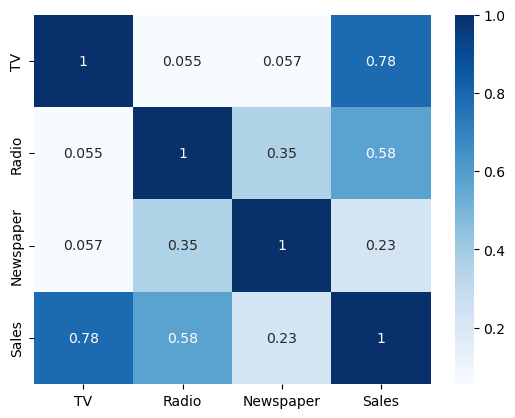

In [10]:
#Calculate the correlation matrix between all the columns
correlation_matrix = df.corr()

#Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True,cmap='Blues')
plt.show()

The Top highly correlated attributes are
1. TV
2. Radio
3. Newspaper
 

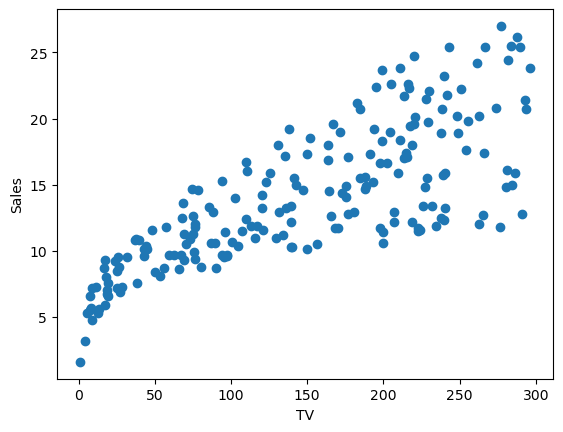

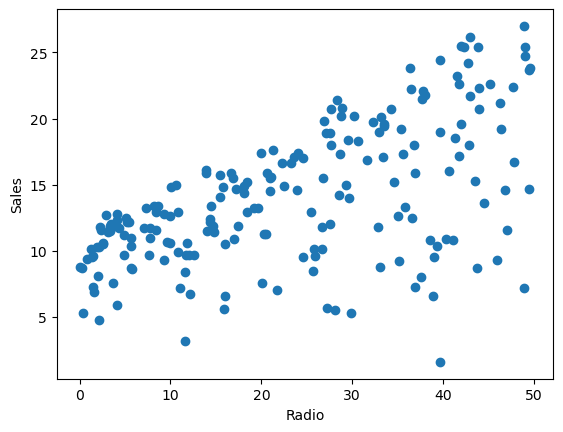

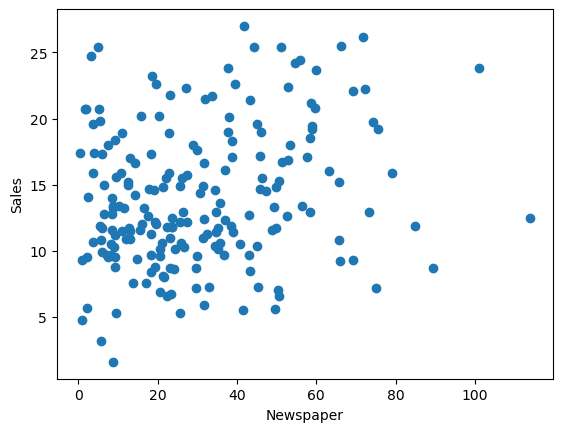

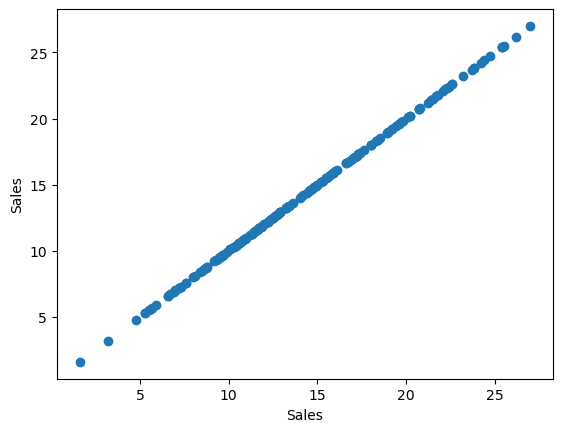

In [11]:
#Create a line chart of each column with 'Sales'
for col in df.columns:
    plt.plot(df[col],df['Sales'],'o')
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.show()

In [12]:
import numpy as np
#Drop additional columns 
df=df[['TV','Radio','Newspaper','Sales']]

In [13]:
#Add polynomial terms for 'TV' and 'Radio'
df['TV_sq']=df['TV']**2
df['Radio_sq'] = df['Radio']**2

#Add interation term for 'TV' and 'Radio'
df['TV_Radio']=df['TV']*df['Radio']

#Create the feature matrix with the original features, polynomial terms and interaction terms
X= df[['TV','Radio','Newspaper','TV_sq','Radio_sq','TV_Radio']]

In [14]:
#Create the y dataframe with the sale data
Y=df[['Sales']].values

In [15]:
#Split the data into training and testing sets
X=df.drop('Sales',axis=1)
Y=df['Sales']
X_Train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=45)

In [17]:
#fit the regression  model with the interaction and polynomial terms as features
model= LinearRegression()
model.fit(X_Train,Y_train)

LinearRegression()

In [18]:
#Evaluate the performance of the model on testing data
Y_pred=model.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred)
print('Mean squared error:' , mse)

Mean squared error: 0.3430889464853738


In [21]:

from IPython.display import display
from sklearn.preprocessing import StandardScaler

In [31]:
#Define the scalar
scaler=StandardScaler()

#scale the data
scaled_data=scaler.fit_transform(df[['TV','Radio','Newspaper','TV_sq','Radio_sq','TV_Radio']])

#Use the scaled data to fit the model and make predictions
X_Train, X_test, Y_train, Y_test =train_test_split(scaled_data,df['Sales'], test_size=0.3)

#create new data to predict on 
new_data=[[100,50,25,10000,2500,625]]
#TV=100,Radio=50,Newspaper=25

#apply the same scaler used on the training data
new_data_scaled=scaler.transform(new_data)

#pass the preprocessed new data to the model for prediction
y_pred=model.predict(new_data_scaled)

print("Predicted sales: ", y_pred[0])

Predicted sales:  4.812618337276325


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
